In [1]:
import numpy as np
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.layers import Dense
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
import cv2
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
epochs = 50
BASE_DIR = '../'
batch_size = 32

In [3]:
def get_model():
    model = Sequential()
    model.add(Lambda(lambda x: x * 1./255., input_shape=(120, 160, 3), output_shape=(120, 160, 3)))
    model.add(Conv2D(32, (3, 3), input_shape=(120, 160, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.8))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    rms = RMSprop(lr = 0.0001,)
    model.compile(loss='binary_crossentropy',
                optimizer=rms,
                metrics=['accuracy'])

    return model

In [4]:
model = get_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 120, 160, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 118, 158, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 118, 158, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 79, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 77, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 57, 77, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 38, 32)        0         
__________

In [5]:
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []

    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            if wbc_type in ['NEUTROPHIL', 'EOSINOPHIL']:
                label = 'POLYNUCLEAR'
            else:
                label = 'MONONUCLEAR'
            for image_filename in os.listdir(folder + wbc_type):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                if img_file is not None:
                    # Downsample the image to 120, 160, 3
                    img_file = scipy.misc.imresize(arr=img_file, size=(120, 160, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [6]:
X_train, y_train = get_data(BASE_DIR + 'images/TRAIN/')
print(y_train)
X_test, y_test = get_data(BASE_DIR + 'images/TEST/')

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)
print(y_train)

/usr/local/lib/python2.7/dist-packages/scipy/misc/pilutil.py:480: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python2.7/dist-packages/scipy/misc/pilutil.py:483: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


['POLYNUCLEAR' 'POLYNUCLEAR' 'POLYNUCLEAR' ... 'MONONUCLEAR' 'MONONUCLEAR'
 'MONONUCLEAR']
[1 1 1 ... 0 0 0]


In [7]:
model = get_model()

# fits the model on batches
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=epochs,
    shuffle=True,
    batch_size=batch_size)

model.save_weights('binary_model_epoch50_lr0.0001_dropout0.8.h5')

Train on 7965 samples, validate on 1992 samples
Epoch 1/50
7965/7965 [==============================] - 26s - loss: 0.6770 - acc: 0.6200 - val_loss: 0.8871 - val_acc: 0.0000e+00
Epoch 2/50
7965/7965 [==============================] - 23s - loss: 0.6705 - acc: 0.6264 - val_loss: 0.9055 - val_acc: 0.0000e+00
Epoch 3/50
7965/7965 [==============================] - 23s - loss: 0.6663 - acc: 0.6262 - val_loss: 1.0237 - val_acc: 0.0000e+00
Epoch 4/50
7965/7965 [==============================] - 23s - loss: 0.6512 - acc: 0.6285 - val_loss: 0.9114 - val_acc: 0.0000e+00
Epoch 5/50
7965/7965 [==============================] - 23s - loss: 0.6341 - acc: 0.6409 - val_loss: 1.1084 - val_acc: 0.0050
Epoch 6/50
7965/7965 [==============================] - 23s - loss: 0.6063 - acc: 0.6699 - val_loss: 0.7773 - val_acc: 0.2636
Epoch 7/50
7965/7965 [==============================] - 24s - loss: 0.5801 - acc: 0.7081 - val_loss: 1.1962 - val_acc: 0.1119
Epoch 8/50
7965/7965 [==============================] 

# Learning Curve

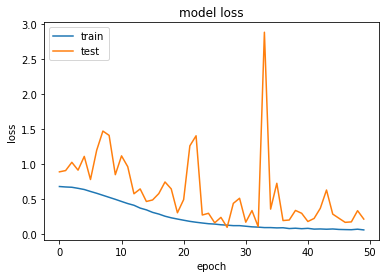

In [8]:
def plot_learning_curve(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.clf()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

plot_learning_curve(history)

# Accuracy

In [9]:
from sklearn.metrics import accuracy_score

print('Predicting on test data')
y_pred = np.rint(model.predict(X_test))

print(accuracy_score(y_test, y_pred))

Predicting on test data
0.9240048250904704


# Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[1054  186]
 [   3 1244]]


# Images Misclassified

In [11]:
false_positive_mononuclear = np.intersect1d(np.where(y_pred == 1), np.where(y_test == 0))
print false_positive_mononuclear

[1297 1307 1434 1482 1563 1692 1819 1869 1874 1875 1879 1882 1883 1885
 1891 1892 1893 1895 1897 1902 1905 1923 1927 1932 1935 1937 1939 1940
 1941 1951 1952 1958 1960 1966 1968 1973 1974 1975 1980 1988 1991 1995
 1996 1998 2001 2005 2007 2009 2014 2022 2025 2037 2039 2041 2043 2044
 2048 2050 2053 2055 2059 2061 2062 2066 2069 2072 2073 2076 2077 2078
 2079 2080 2087 2102 2109 2114 2119 2125 2126 2127 2135 2138 2142 2149
 2151 2152 2160 2164 2175 2177 2180 2182 2183 2189 2191 2194 2195 2198
 2206 2208 2210 2215 2219 2222 2223 2224 2230 2231 2232 2236 2241 2243
 2246 2251 2252 2254 2256 2258 2265 2270 2276 2279 2286 2287 2289 2291
 2293 2298 2300 2301 2312 2314 2317 2320 2321 2324 2325 2326 2327 2334
 2336 2338 2340 2342 2343 2344 2349 2350 2353 2359 2360 2362 2363 2368
 2369 2380 2387 2390 2392 2401 2404 2405 2409 2410 2413 2414 2415 2418
 2427 2429 2431 2434 2435 2437 2443 2450 2451 2455 2457 2461 2462 2464
 2465 2474 2478 2481]


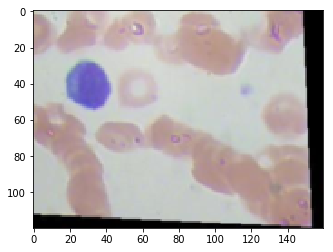

In [12]:
img = X_test[false_positive_mononuclear[0]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Mononuclear Cells Classified Correctly

In [13]:
true_positive_mononuclear = np.intersect1d(np.where(y_pred == 1), np.where(y_test == 1))

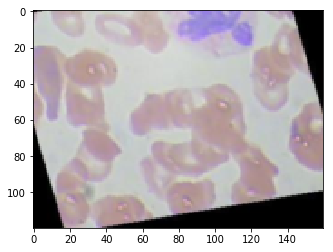

In [14]:
img = X_test[true_positive_mononuclear[0]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

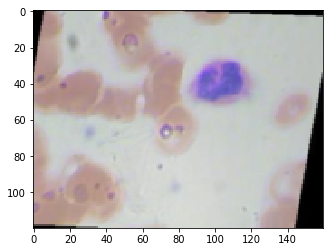

In [15]:
img = X_test[true_positive_mononuclear[5]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

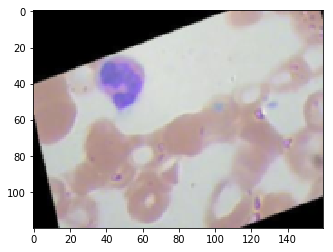

In [16]:
img = X_test[true_positive_mononuclear[8]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Polynuclear Cells Classified Correctly

In [17]:
true_positive_polynuclear = np.intersect1d(np.where(y_pred == 0), np.where(y_test == 0))
print true_positive_polynuclear

[1247 1248 1249 ... 2484 2485 2486]


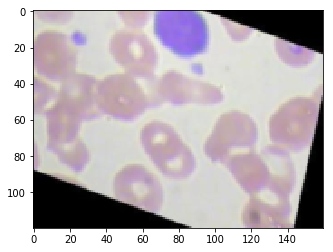

In [18]:
img = X_test[true_positive_polynuclear[21]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

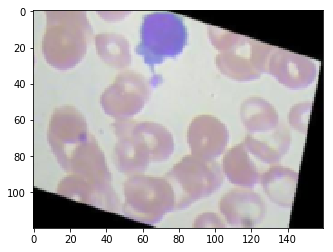

In [19]:
img = X_test[true_positive_polynuclear[53]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

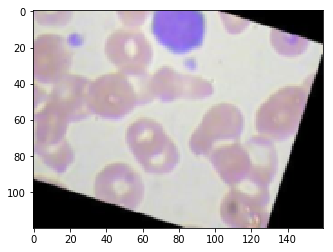

In [20]:
img = X_test[true_positive_polynuclear[16]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))